In [673]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# NETFLIX DATA

In [674]:
netflix_data = yf.download('NFLX', start='2022-04-09', end='2024-04-09')

[*********************100%%**********************]  1 of 1 completed


# DESCRIPTIVES

In [695]:
netflix_data.diff().describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,499.00,499.00,499.00,499.00,499.00,4.990000e+02
mean,0.57,0.57,0.57,0.56,0.56,-3.282160e+03
std,9.50,9.76,9.51,10.55,10.55,7.570394e+06
min,-88.02,-102.98,-120.71,-122.42,-122.42,-7.988590e+07
25%,-4.67,-4.31,-3.47,-4.33,-4.33,-1.437500e+06
50%,0.28,0.12,0.76,0.18,0.18,-1.596000e+05
75%,5.47,4.61,4.44,5.15,5.15,1.082000e+06
max,53.74,63.54,55.67,55.58,55.58,1.124806e+08


In [698]:
close_data = netflix_data["Adj Close"]
close_stats = close_data.diff().describe().round(2)
close_stats_df = pd.DataFrame(close_stats)
print(close_stats_df)

       Adj Close
count     499.00
mean        0.56
std        10.55
min      -122.42
25%        -4.33
50%         0.18
75%         5.15
max        55.58


# STOCK PRICE MOVEMENT

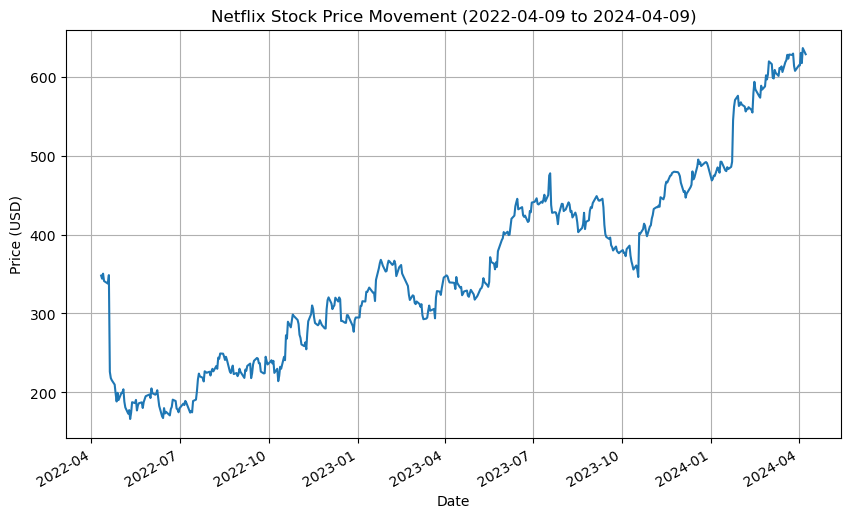

In [675]:
plt.figure(figsize=(10, 6))
netflix_data['Adj Close'].plot()
plt.title('Netflix Stock Price Movement (2022-04-09 to 2024-04-09)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# ANNUALISED AVERAGE RETURN AND ANNUALISED STANDARD DEVIATION

In [676]:
returns = netflix_data['Adj Close'].pct_change().dropna()
annualized_return = np.mean(returns) * 252

In [677]:
annualized_std_dev = np.std(returns) * np.sqrt(252)

In [678]:
print("Annualized Average Return:", annualized_return)
print("Annualized Standard Deviation:", annualized_std_dev)

Annualized Average Return: 0.442029323768531
Annualized Standard Deviation: 0.5195199417885064


In [699]:
netflix_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-02,611.000000,615.030029,605.510010,614.210022,614.210022,2029200
2024-04-03,612.750000,630.409973,611.500000,630.080017,630.080017,2931200
2024-04-04,633.210022,638.000000,616.580017,617.140015,617.140015,3064300
2024-04-05,624.919983,637.909973,622.710022,636.179993,636.179993,3372800
2024-04-08,636.390015,639.000000,628.109985,628.409973,628.409973,2139300


# BINOMIAL TREE PRICING

In [679]:
S0 = 620
K = 620
T = 1  
r = 0.043  
sigma = annualized_std_dev  
N = 6
payoff = 'put'

In [680]:
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u

In [681]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [682]:
S

array([[ 620.        ,  766.48306653,  947.57466336, 1171.45150604,
        1448.22216556, 1790.38349432, 2213.38488871],
       [   0.        ,  501.51140551,  620.        ,  766.48306653,
         947.57466336, 1171.45150604, 1448.22216556],
       [   0.        ,    0.        ,  405.66724171,  501.51140551,
         620.        ,  766.48306653,  947.57466336],
       [   0.        ,    0.        ,    0.        ,  328.13991703,
         405.66724171,  501.51140551,  620.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
         265.4288887 ,  328.13991703,  405.66724171],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  214.7026049 ,  265.4288887 ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,  173.67065347]])

In [683]:
a = np.exp(r * dT)    
p = (a - d)/ (u - d)  
q = 1.0 - p
p

0.48095427948580377

In [684]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 214.33275829],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 354.5711113 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 446.32934653]])

In [685]:
for j in range(N-1, -1, -1): 
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 92.90757061,  47.25642298,  14.68965044,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        , 137.79259423,  78.74757607,  28.7098375 ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        , 196.33696205, 127.30342901,
         56.11125821,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 265.76514481,
        196.81175913, 109.6653124 ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        337.05011213, 283.03680088, 214.33275829],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 396.47411301, 354.5711113 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 446.32934653]])

In [686]:
print('European ' + payoff, str( V[0,0]))

European put 92.90757060677079


In [687]:
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])) 
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[101.33507225,  51.28437647,  15.87152762,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        , 150.53117187,  85.52477162,  31.0197292 ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        , 214.95373731, 138.40858282,
         60.62577104,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 291.86008297,
        214.33275829, 118.48859449,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        354.5711113 , 291.86008297, 214.33275829],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 405.2973951 , 354.5711113 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 446.32934653]])

In [688]:
print('American ' + payoff, str( V[0,0]))

American put 101.33507225184442


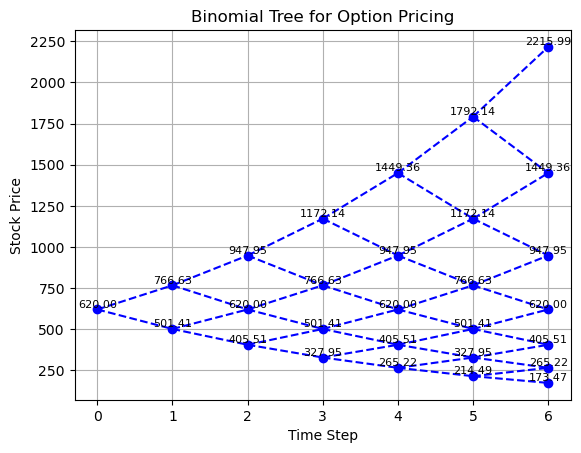

Option Values at Final Nodes (European Put):
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.13686838e-13]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.14491735e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.54779108e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.46533445e+02]]


In [700]:
def generate_binomial_tree(S0, K, T, r, sigma, n):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    tree = np.zeros((n+1, n+1))
    for j in range(n+1):
        for i in range(j+1):
            tree[i, j] = S0 * (u ** (j - i)) * (d ** i)
    
    return tree

def calculate_option_value(tree, K, option_type='put'):
    n = tree.shape[1] - 1
    option_values = np.zeros_like(tree)
    if option_type == 'call':
        for i in range(n+1):
            option_values[i, n] = max(0, tree[i, n] - K)
    elif option_type == 'put':
        for i in range(n+1):
            option_values[i, n] = max(0, K - tree[i, n])
    return option_values

def plot_binomial_tree(tree):
    n = tree.shape[1] - 1
    for j in range(n+1):
        for i in range(j+1):
            plt.plot(j, tree[i, j], 'bo')
            plt.text(j, tree[i, j], f'{tree[i, j]:.2f}', va='bottom', ha='center', fontsize=8)
    
    for j in range(n):
        for i in range(j+1):
            plt.plot([j, j+1], [tree[i, j], tree[i, j+1]], 'b--')
            plt.plot([j, j+1], [tree[i, j], tree[i+1, j+1]], 'b--')

    plt.xlabel('Time Step')
    plt.ylabel('Stock Price')
    plt.title('Binomial Tree for Option Pricing')
    plt.grid(True)
    plt.show()

S0 = 620
K = 620 
T = 1 
r = 0.043
sigma = 0.52
n = 6

tree = generate_binomial_tree(S0, K, T, r, sigma, n)
plot_binomial_tree(tree)

option_values_put = calculate_option_value(tree, K, option_type='put')
print("Option Values at Final Nodes (European Put):\n", option_values_put)

# MONTE CARLO SIMULATION

In [689]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t])    
        # Price process, see Hilpisch (2015) chapter 1 (equation 1-1) & chapter 3 (equation 3-6)
    return S

In [690]:
S0 = 620
K = 620
T = 1  
r = 0.043  
sigma = annualized_std_dev 

In [691]:
S = mcs_simulation_np(1000)

In [692]:
S = np.transpose(S)
S

array([[ 620.        ,  636.46521599,  619.59618323, ...,  423.13739275,
         418.23538338,  416.03127448],
       [ 620.        ,  613.12135694,  613.21742791, ...,  748.32367972,
         750.01600686,  736.6234475 ],
       [ 620.        ,  601.77743067,  600.20981288, ..., 1347.667888  ,
        1318.43885131, 1374.52665558],
       ...,
       [ 620.        ,  626.06300551,  616.74005797, ...,  448.50354715,
         439.81861676,  441.90019125],
       [ 620.        ,  622.91862785,  622.04417872, ...,  378.48601205,
         382.94261328,  383.77597456],
       [ 620.        ,  625.24941584,  620.07391707, ...,  650.95571011,
         639.81574499,  659.77704043]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

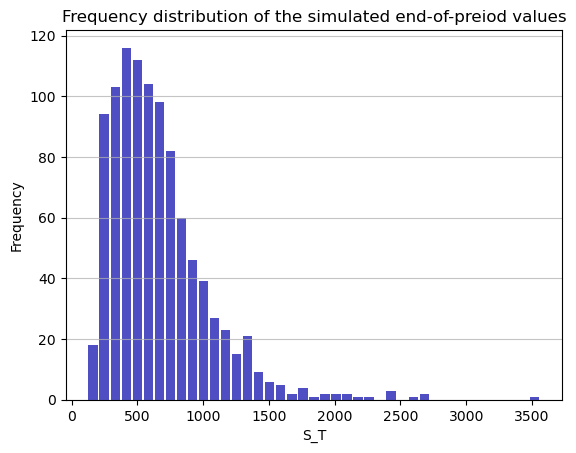

In [693]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')